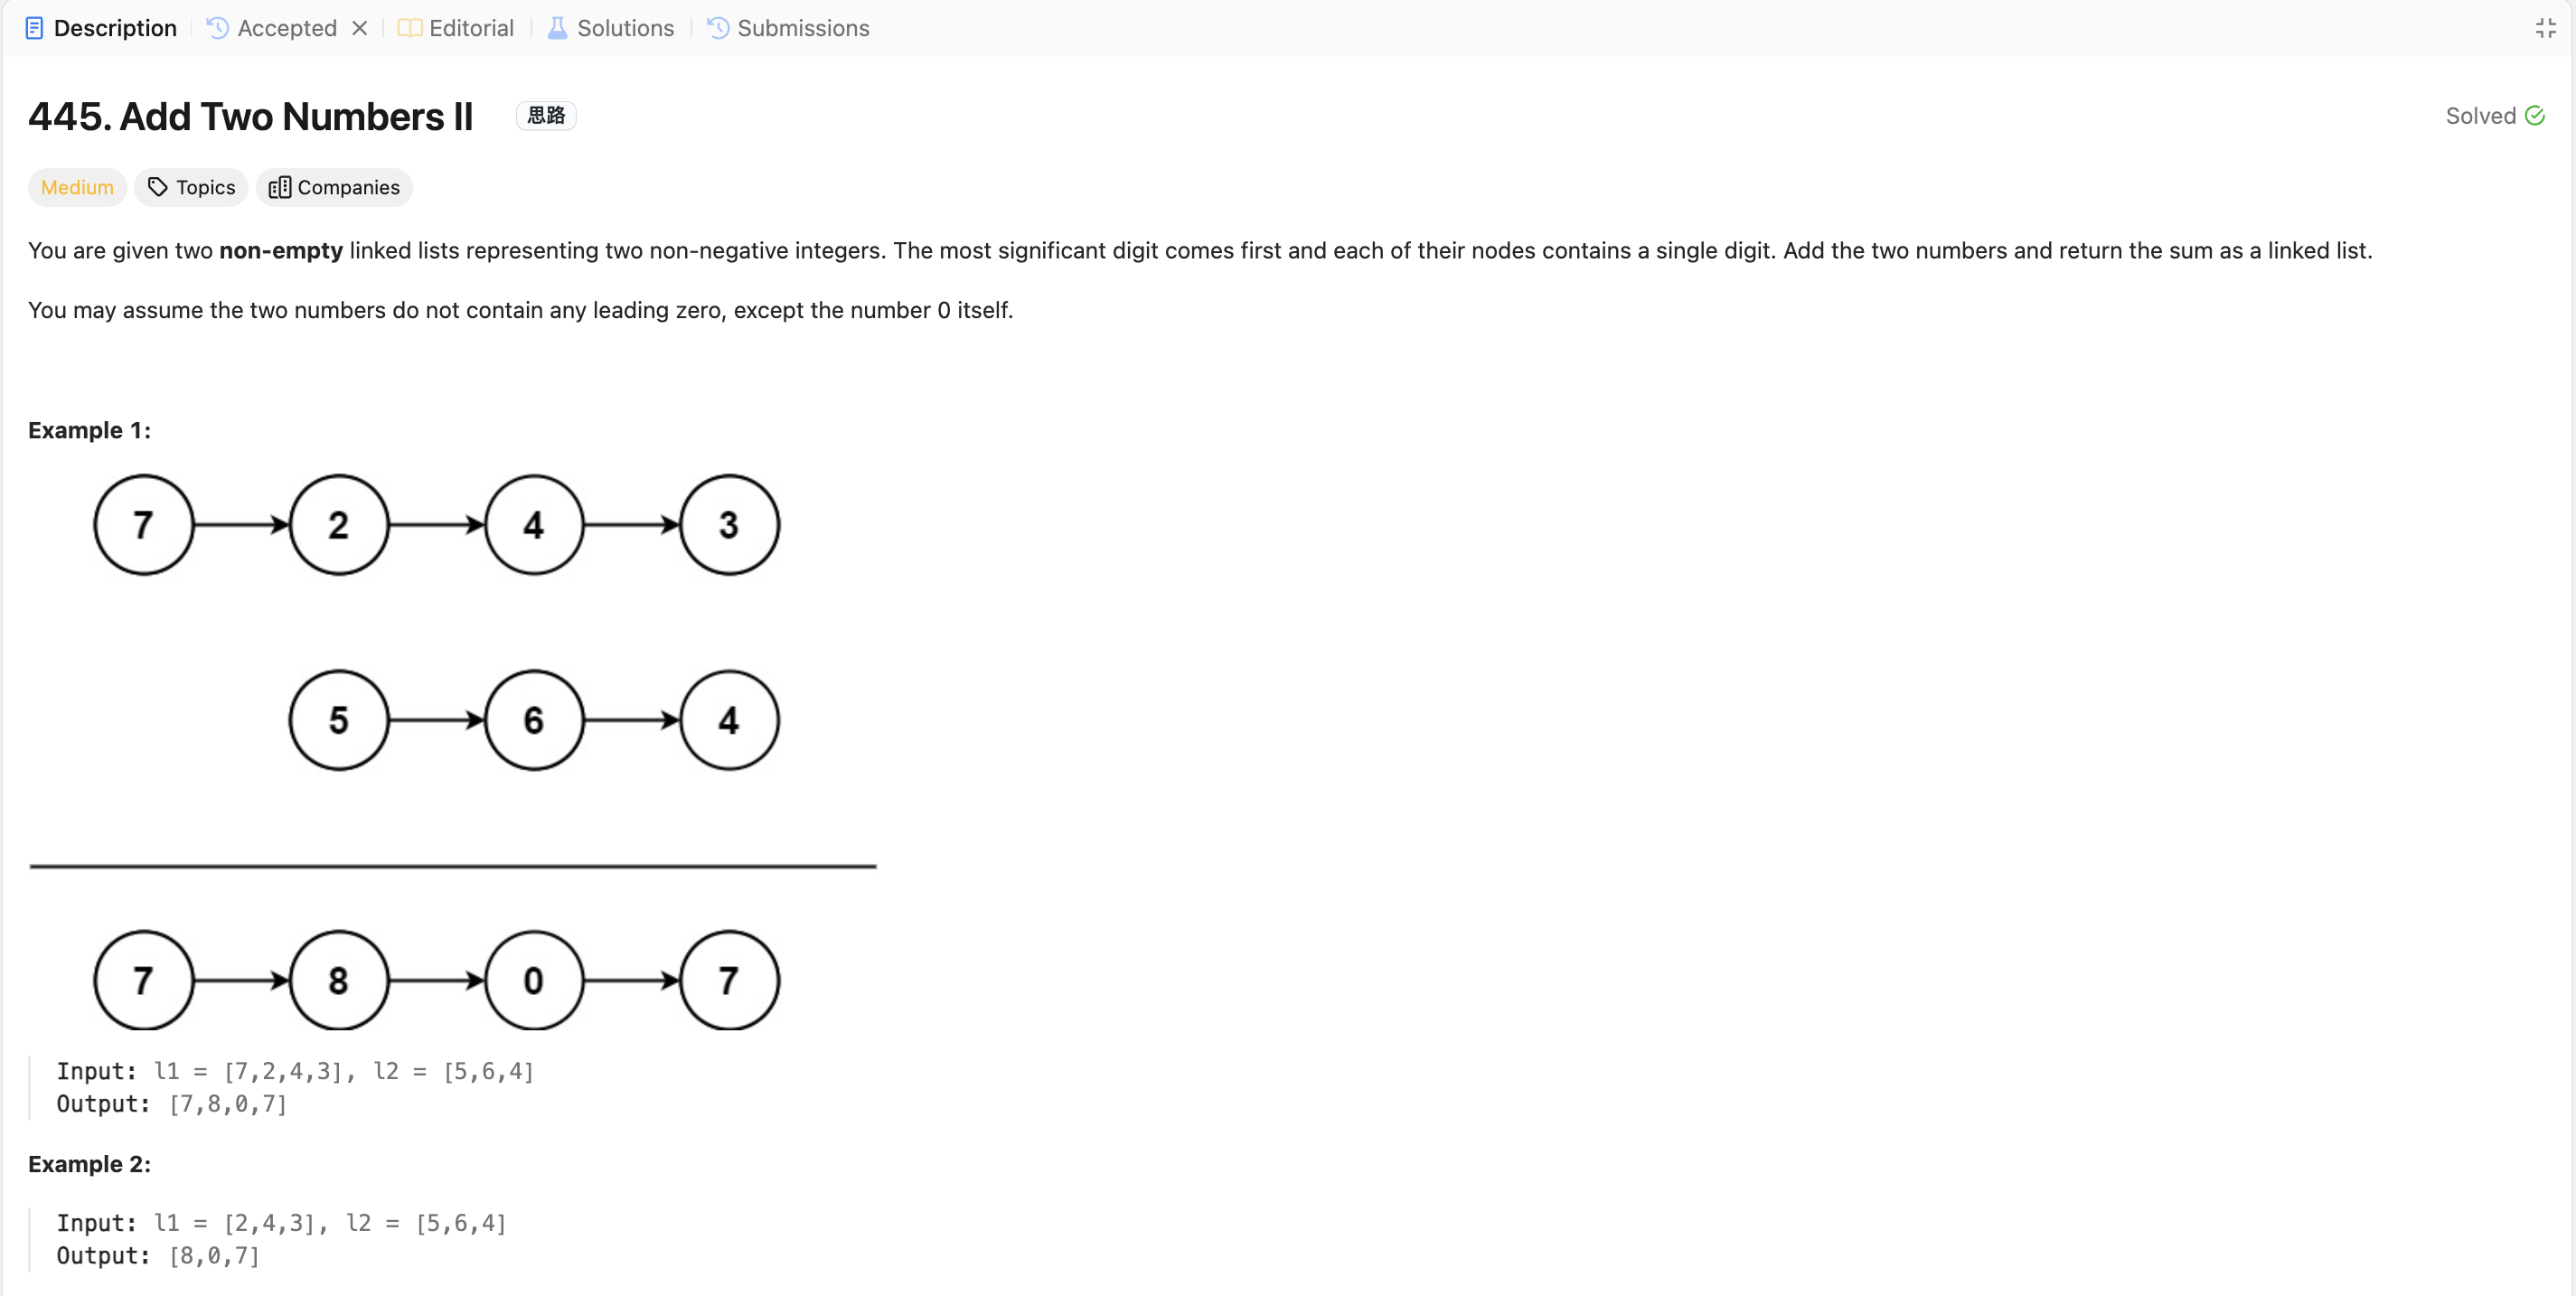

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:

        if l1 is None and l2 is None:
            return None
        elif l1 is None:
            return l2
        elif l2 is None:
            return l1

        l1 = self.reverseLinkedList(l1)
        l2 = self.reverseLinkedList(l2)
        p1 = l1
        p2 = l2

        dummyhead = ListNode(-1)
        p3 = dummyhead
        complement = 0
        while p1 is not None or p2 is not None:
            if p1 is None:
                cursum = p2.val + complement
                p2 = p2.next
            elif p2 is None:
                cursum = p1.val + complement
                p1 = p1.next
            else:
                cursum = p1.val + p2.val + complement
                p1 = p1.next
                p2 = p2.next
            complement = cursum // 10
            cursum = cursum % 10
            p3.next = ListNode(cursum)
            p3 = p3.next

        if complement != 0:
            p3.next = ListNode(complement)
            p3 = p3.next

        return self.reverseLinkedList(dummyhead.next)

    def reverseLinkedList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return head
        # 由于单链表的结构，至少要用三个指针才能完成迭代反转
        # cur 是当前遍历的节点，pre 是 cur 的前驱结点，nxt 是 cur 的后继结点
        pre, cur, nxt = None, head, head.next
        while cur is not None:
            # 逐个结点反转
            cur.next = pre
            # 更新指针位置
            pre = cur
            cur = nxt
            if nxt is not None:
                nxt = nxt.next
        # 返回反转后的头结点
        return pre